In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
dataset = pd.read_csv("Model 6.csv")

In [13]:
dataset.head(5)

,A,B,C,D,E,F
0,0.5,1.1,1.9,2.7,2.6,0.7
1,1.1,0.7,2.7,2.6,2.2,0.4
2,0.7,0.4,2.6,2.2,2.0,0.5
3,0.4,0.5,2.2,2.0,2.7,1.2
4,0.5,1.2,2.0,2.7,3.2,1.9


In [14]:
# Split into features (X) and target (y)
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [15]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
from sklearn.model_selection import cross_val_score

In [19]:
# Define the range of values for the number of trees
num_trees_range = range(10, 110, 10)

In [20]:
cv_scores = []

In [21]:
# Iterate over the range of values for the number of trees
for num_trees in num_trees_range:
    random_forest = RandomForestRegressor(n_estimators=num_trees)
    scores = cross_val_score(random_forest, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(np.mean(scores))

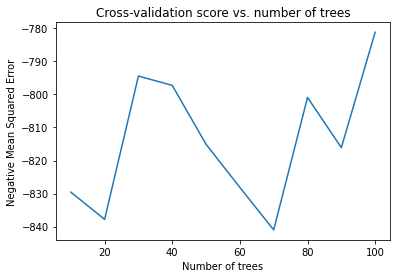

In [22]:
# Plot the cross-validation scores
plt.plot(num_trees_range, cv_scores)
plt.xlabel('Number of trees')
plt.ylabel('Negative Mean Squared Error')
plt.title('Cross-validation score vs. number of trees')
plt.show()

In [23]:
# Find the optimal value for the number of trees
optimal_num_trees = num_trees_range[np.argmax(cv_scores)]
print('Optimal number of trees:', optimal_num_trees)

Optimal number of trees: 100


In [24]:
# Train a final Random Forest model with the optimal number of trees
random_forest = RandomForestRegressor(n_estimators=optimal_num_trees)
random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [25]:
# Evaluate the performance of the model on a separate test set
y_pred = random_forest.predict(X_test)
test_score = mean_squared_error(y_test, y_pred)

print('Optimal number of trees:', optimal_num_trees)
print('Test score:', test_score)

Optimal number of trees: 100
Test score: 216.11321686508768


In [26]:
# Predict on the training and testing data
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)
# Calculate the training and testing error metrics
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
nse_train = 1 - mean_squared_error(y_train, y_train_pred) / np.var(y_train)
r2_train = r2_score(y_train, y_train_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
nse_test = 1 - mean_squared_error(y_test, y_test_pred) / np.var(y_test)
r2_test = r2_score(y_test, y_test_pred)

In [27]:
print("Random Forest Regressor:")
print("Train RMSE: {:.4f}".format(rmse_train))
print("Train NSE : {:.4f}".format(nse_train))
print("Train R^2 : {:.4f}".format(r2_train))
print("Test RMSE : {:.4f}".format(rmse_test))
print("Test NSE  : {:.4f}".format(nse_test))
print("Test R^2  : {:.4f}".format(r2_test))


Random Forest Regressor:
Train RMSE: 10.2655
Train NSE : 0.9198
Train R^2 : 0.9198
Test RMSE : 14.7008
Test NSE  : 0.4309
Test R^2  : 0.4309


In [28]:
pd.DataFrame(y_train).to_csv('/content/actualTrain.csv', index=False, header=False)
pd.DataFrame(y_train_pred).to_csv('/content/predictTrain.csv', index=False, header=False)
pd.DataFrame(y_test).to_csv('/content/actualTest.csv', index=False, header=False)
pd.DataFrame(y_test_pred).to_csv('/content/predictTest.csv', index=False, header=False)

FURTHE CODES TO BE IMPLEMENT / TO DO 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer

In [ ]:
# Define the search space
param_grid = {
    'n_estimators': [10, 20, 50, 100],
    'max_depth': [2, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [ ]:
# Define the fitness function
def fitness_function(X_train, y_train, params):
    regressor = RandomForestRegressor(**params)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_train)
    return mean_squared_error(y_train, y_pred)

In [ ]:
!pip install sklearn-deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 KB 5.5 MB/s eta 0:00:00


In [2]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 KB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 630.1/630.1 KB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 79.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 KB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 75.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.1/167.1 KB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 80.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 K

In [5]:
# Define the GA algorithm
import pycaret
from evolutionary_search import EvolutionaryAlgorithmSearchCV
search = EvolutionaryAlgorithmSearchCV(
    estimator=RandomForestRegressor(),
    params=param_grid,
    scoring=make_scorer(fitness_function, greater_is_better=False, needs_proba=False),
    cv=5,
    verbose=True,
    population_size=10,
    gene_mutation_prob=0.10,
    gene_crossover_prob=0.5,
    tournament_size=3,
    generations_number=10,
    n_jobs=-1,
    refit=False,
    random_state=42
)


ModuleNotFoundError: ignored

In [ ]:

# Fit the GA algorithm to the training data
search.fit(X_train, y_train)

# Evaluate the best model on the test data
best_regressor = search.best_estimator_
y_pred = best_regressor.predict(X_test)
test_score = mean_squared_error(y_test, y_pred)

# Print the best parameters and test score
print('Best Parameters:', search.best_params_)
print('Test score:', test_score)